<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8ECU3D/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8ECU3D/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8ECU3D/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
encoder = info.features['text'].encoder
encoder.subwords[2000:2010]

['Cha',
 'sco',
 'represent',
 'portrayed_',
 'outs',
 'dri',
 'crap_',
 'Oh',
 'word_',
 'open_']

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_data.padded_batch(BATCH_SIZE, train_data.output_shapes)

test_dataset = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)

train_batch, train_labels = next(iter(train_dataset))
train_batch.numpy()

array([[  62,   18,   41, ...,    0,    0,    0],
       [  12,   31,   93, ...,    0,    0,    0],
       [ 636,  102, 4714, ...,    0,    0,    0],
       ...,
       [ 133, 1955,    5, ...,    0,    0,    0],
       [2635, 1610,   48, ...,    0,    0,    0],
       [  12,  196, 7968, ...,    0,    0,    0]])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 46s 118ms/step - loss: 0.6420 - accuracy: 0.6086 - val_loss: 0.4609 - val_accuracy: 0.7974
Epoch 2/10
391/391 [==============================] - 45s 116ms/step - loss: 0.3410 - accuracy: 0.8614 - val_loss: 0.3501 - val_accuracy: 0.8661
Epoch 3/10
391/391 [==============================] - 46s 117ms/step - loss: 0.2489 - accuracy: 0.9073 - val_loss: 0.3653 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 45s 115ms/step - loss: 0.2076 - accuracy: 0.9252 - val_loss: 0.3555 - val_accuracy: 0.8776
Epoch 5/10
391/391 [==============================] - 45s 115ms/step - loss: 0.1899 - accuracy: 0.9338 - val_loss: 0.4002 - val_accuracy: 0.8677
Epoch 6/10
391/391 [==============================] - 45s 115ms/step - loss: 0.1729 - accuracy: 0.9412 - val_loss: 0.3897 - val_accuracy: 0.8703
Epoch 7/10
391/391 [==============================] - 44s 114ms/step - loss: 0.1616 - accuracy: 0.9464 - val_loss: 0.3954 - val_ac

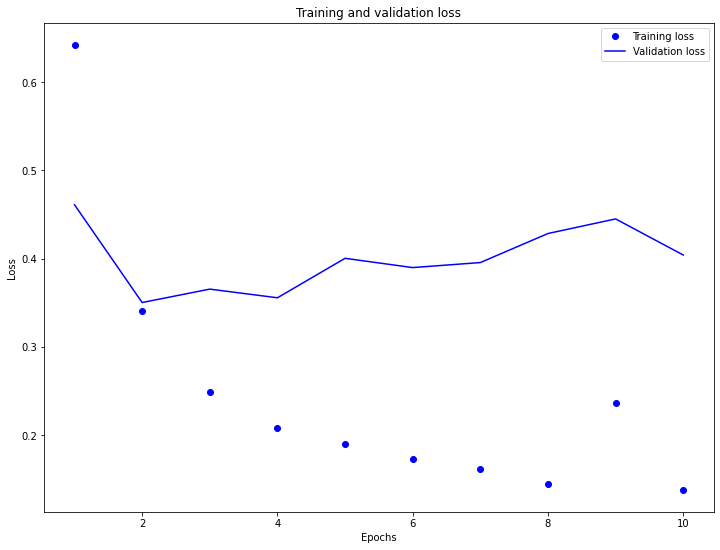

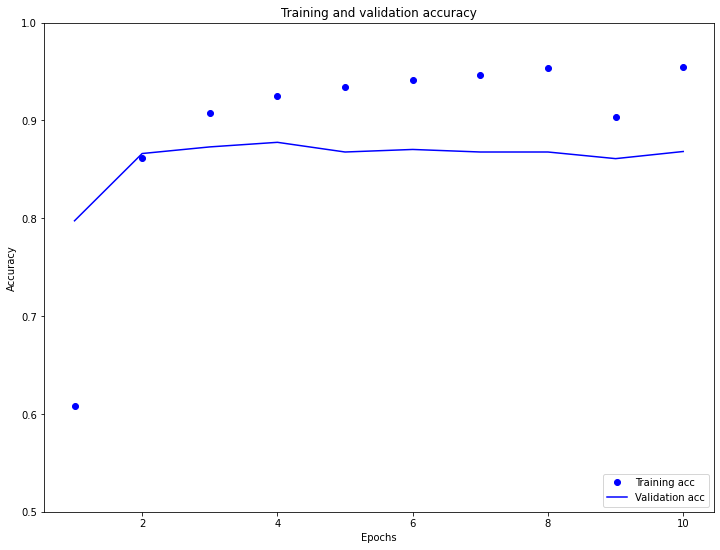

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [15]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [16]:
sample_pred_text = ('The movie was outrageous. The story was cool but graphics needed work. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.28822175]]
